# Pandas Exercises (Solutions)

[Pandas lesson page](https://unc-libraries-data.github.io/Python/Jupyter/Pandas.html)

[Exercises](https://unc-libraries-data.github.io/Python/Jupyter/PandasExercises.html)

## Setup

Download the csv file <a href="https://unc-libraries-data.github.io/Python/Jupyter/CountyHealthData_2014-2015.csv">CountyHealthData_2014-2015.csv</a>.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("CountyHealthData_2014-2015.csv")
# df = pd.read_csv(r"C:\Users\npbyers\Desktop\Python\Jupyter\CountyHealthData_2014-2015.csv")

## Exercises

**1.** What are the 5 states with the highest average adult smoking rates? Show the states and their smoking rates. 

* You'll need to use the `.groupby()` and `.mean()` functions to reorganize your data to feature state-level statistics.

In [2]:
states=df.groupby(["State"]).mean() # group your counties by state, get means

* The `.sort_values()` function can be used to sort your dataframe by column values like "Adult smoking". Becaue `sort_values()` scrambles the existing indices, you'll need to reset the indices of your dataframe using `.reset_index()` so that you can easily index your sorted rows later.

In [3]:
states_sorted = states.sort_values(by="Adult smoking", ascending=False).reset_index().copy()
states_sorted.head()

,State,FIPS,GEOID,Premature death,Poor or fair health,Poor physical health days,Poor mental health days,Low birthweight,Adult smoking,Adult obesity,...,Drug poisoning deaths,Uninsured adults,Uninsured children,Health care costs,Could not see doctor due to cost,Other primary care providers,Median household income,Children eligible for free lunch,Homicide rate,Inadequate social support
0,KY,21120.000000,21120.000000,9926.033333,0.242052,5.401681,4.805405,0.093389,0.285237,0.333404,...,22.446202,0.219096,0.067854,10945.350000,0.195421,70.008368,38807.483333,0.514336,5.312029,0.207121
1,AK,2162.130435,2162.130435,9642.682927,0.151773,3.569565,2.617391,0.055750,0.272043,0.303391,...,15.774286,0.328652,0.154565,7103.239130,0.158609,122.108696,56804.978261,0.408667,9.352500,0.266545
2,WV,54055.000000,54055.000000,9540.600000,0.216655,4.825926,4.214545,0.091545,0.267182,0.339591,...,23.848161,0.232855,0.051100,9915.918182,0.181491,73.296296,38279.600000,0.463459,6.454250,0.194283
3,TN,47095.000000,47095.000000,9816.500000,0.228440,4.968539,3.793590,0.089105,0.259626,0.325395,...,18.772343,0.213389,0.060963,10840.742105,0.199329,73.563830,39572.068421,0.519016,6.212523,0.188288
4,MO,29117.235808,29117.235808,8482.240175,0.190306,4.199083,4.035165,0.076140,0.254155,0.320633,...,14.325878,0.219498,0.089410,9561.834061,0.164266,46.031963,40041.275109,0.419683,6.001129,0.180250


* Once your new smoking dataframe has been sorted and reset, you can index the top 5 rows  to find the top 5 smoking states. (Hint: use `.loc` to index specific areas of your dataframe)

In [4]:
states_sorted.loc[0:4,["State","Adult smoking"]] #.loc allows us to view only the columns & rows we select

,State,Adult smoking
0,KY,0.285237
1,AK,0.272043
2,WV,0.267182
3,TN,0.259626
4,MO,0.254155


**2.** Food Environment Index (FEI) measures access to food and food insecurity (0 is bad, 10 is good). According to <a href="https://www.countyhealthrankings.org/explore-health-rankings/measures-data-sources/county-health-rankings-model/health-factors/health-behaviors/diet-exercise/food-environment-index">countyhealthrankings.org</a>, "In 2019, the average FEI value for counties was 7.5 and most counties fell between about 6.9 and 8.2." (Caveat: our data is from 2014-2015)

* Can you find all the counties with FEI values of 9 or higher? How many are there? (Hint: Use indexing and conditionals to select only the rows you need. You can use `.shape` to see how many rows you are left with)

In [5]:
highFEIs = df[df["Food environment index"] >= 9].copy() # keep only the counties in which the FEI value is 9 or higher
highFEIs = highFEIs[['State', 'County', 'Food environment index']] # keep only the relevant columns
highFEIs.shape # See how many rows you are left with to get a count

(236, 3)

* What are the 5 most represented states in this group of counties and how many counties from these 5 states are included in your new dataframe? (hint: use the `.value_counts()` function to output a ranked list of all the unique values in the column with the number of times each appears in your dataframe. In other words, this function will give you a list of the states in your new dataframe along with the number of times they appear.)
    ```
    #example:
    df['Column Name'].value_counts()
    ```

In [6]:
highFEIs['State'].value_counts().head() #use .value_counts() to get an ordered list of the counts and .head() to 
                                        # to display the top 5 states

VA    64
ND    33
MN    31
NY    19
MD    18
Name: State, dtype: int64

**3.** In many counties one can find more primary care physicians than dentists. However, in a few counties there are more than 5 times (!) as many dentists as there are primary care physicians.
    

* Which counties are these? (hint: Using conditionals, create a new dataframe `dfDent` with only these counties. Use `.loc` to show the relevant information - you'll need "County", "State", "Dentists", "Primary care physicians", and "2011 population estimate" for this exercise.)
    * Note: It is important to use the `.copy()` method when creating new dataframes instead of using slices of existing dataframes. This will prevent certain assignment errors when you begin working with your new dataframe.
    ```
    # Example using .copy()
    dfNew = df['Column1'].copy()
    
    #example using slices
    dfNew = df['Column1']
    ```
    

In [7]:
dfDent = df[df["Dentists"] > 5*df['Primary care physicians']].copy()
dfDent.loc[:,["County", "State", "Dentists", "Primary care physicians", "2011 population estimate"]]

,County,State,Dentists,Primary care physicians,2011 population estimate
378,Glenn County,CA,71.0,14.0,27992
379,Glenn County,CA,72.0,14.0,27940
509,Dolores County,CO,49.0,0.0,2029
801,Chattahoochee County,GA,358.0,61.0,12842
1312,Fremont County,ID,52.0,8.0,12957
1313,Fremont County,ID,54.0,8.0,12927
1374,Cass County,IL,52.0,7.0,13338
1375,Cass County,IL,53.0,7.0,13324
2053,Jackson County,KY,45.0,7.0,13331
2054,Jackson County,KY,45.0,8.0,13427


* Which of these counties has the most dentists? (hint: `use .sort_values` on your new dataframe, `dfDent`)

In [8]:
dfDent.sort_values(by="Dentists", ascending=False).loc[:,["County", "State", "Dentists"]]
#.sort_values() reorders your dataframe, while .loc displays only the relevant counties
#Note how the indices on the left are left out-of-order by the sorting function

,County,State,Dentists
801,Chattahoochee County,GA,358.0
3578,Deuel County,NE,103.0
379,Glenn County,CA,72.0
378,Glenn County,CA,71.0
1313,Fremont County,ID,54.0
1375,Cass County,IL,53.0
3597,Garden County,NE,53.0
1312,Fremont County,ID,52.0
1374,Cass County,IL,52.0
509,Dolores County,CO,49.0


* Which of these has the most dentists per capita? (hint: You can use `.loc` to add columns (and rows) to your dataframe. You can set the column based on values in other columns using simple operators. After adding a new column, you can sort using the `sort_values()` method.
```
# Example syntax: adding a column
df.loc[:, "Column3"] = df[Column1]*df[Column2]
#This adds a new column, "Column3," with values equal to the products of the values for Column1 and Column2 in each row.
```


In [9]:
#create a new column with the Dentists per capita values
dfDent.loc[:, 'Dentists per capita'] = dfDent.loc[:, 'Dentists']/dfDent.loc[:, '2011 population estimate']

# sort the dataframe from high to low by "Dentists per capita"
# display only the relevant columns with .loc
dfDent.loc[:, ['County', 'State', 'Dentists per capita']].sort_values(by='Dentists per capita', ascending=False)

,County,State,Dentists per capita
3578,Deuel County,NE,0.053175
801,Chattahoochee County,GA,0.027877
3597,Garden County,NE,0.027865
509,Dolores County,CO,0.024150
1313,Fremont County,ID,0.004177
1312,Fremont County,ID,0.004013
1375,Cass County,IL,0.003978
1374,Cass County,IL,0.003899
2053,Jackson County,KY,0.003376
2054,Jackson County,KY,0.003351


**4.** Create a dataframe (again, use `.copy()`) that only includes counties in the state of North Carolina. (Hint: use the Rhode Island example from "Indexing" section to select the values for a single state)

In [10]:
NCdf = df[df["State"]=="NC"].copy()

* Sort your new dataframe by "Adult obesity" then use `.loc` to display the County name, "State," "Adult obesity," and "Physical inactivity" for each county. Do you notice any patterns? How do "Pysical inactivity" values change as "Adult obesity" values go up or down?
```
#sorting example:
df.sortvalues(by="Column1", ascending=False)
#the 'by' parameters tells the function which column to sort by, while the 'ascending' parameter lets the computer know to sort high-low or low-high
```

In [11]:
NCdf.sort_values(by="Adult obesity", ascending=False).loc[:, ["County", "State", "Adult obesity", "Physical inactivity"]]

,County,State,Adult obesity,Physical inactivity
3397,Robeson County,NC,0.407,0.372
3308,Edgecombe County,NC,0.397,0.303
3398,Robeson County,NC,0.395,0.348
3326,Halifax County,NC,0.392,0.346
3325,Halifax County,NC,0.379,0.339
...,...,...,...,...
3251,Ashe County,NC,0.225,0.277
3331,Henderson County,NC,0.219,0.235
3332,Henderson County,NC,0.218,0.231
3378,Orange County,NC,0.213,0.158


* Use `matplotlib` to visualize this relationship. Does your plot look the way you expected it to?
```
#syntax example:
plt.scatter(x=df["Coumn1"], y=df["Column2"])
plt.xlabel("Column1")
plt.ylabel("Column2")
```

Text(0, 0.5, 'Physical inactivity')

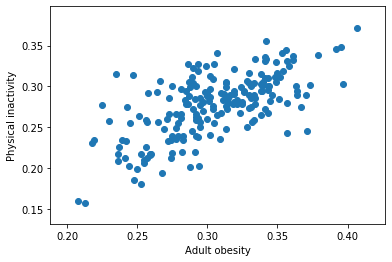

In [12]:
plt.scatter(x=NCdf["Adult obesity"],
            y=NCdf["Physical inactivity"])
plt.xlabel("Adult obesity")
plt.ylabel("Physical inactivity")

**5.** The "Some college" column denotes the percantage of the population that have taken any number of college classes. 

* What is the "Some college" value for Orange County, North Carolina in 2015? (Hint: You can filter your dataframe using multiple columns using the .isin() function. To do so, declare a list for each column(s) you want to filter by. Populate that list with the values you wish to retain. You can then use one or multiple isin() statements when indexing your data frame to filter based on column values. Note, all of the years in our sheet follow this format: "1/1/2015" or "1/1/2014."))
    ```
    #example syntax:
    Letters = ["X, Y, Z"]
    Numbers = ["1, 2, 3"]
    df[df.Column1.isin(Letters) & df.County.isin(Numbers)]
    #this will return a dataframe with rows that have values for Column 1 and Column 2 that were in your Letters and Numbers lists, respectively
    ```

In [13]:
#Using df.column.isin(list)
stateList = ["NC"]
countyList = ["Orange County"]
yearList = ["1/1/2015"]
df[df.State.isin(stateList) & df.County.isin(countyList) & df.Year.isin(yearList)].loc[:, ["County", "State", "Some college"]]
# This selects only rows with column values that are in the lists above.
# We use .loc here to display only the relevant columns from our filtered dataframe.

,County,State,Some college
3378,Orange County,NC,0.789


* How does it compare to the "Some college" value for Orange County, California?

In [14]:
#Using df.column.isin(list)
stateList = ["NC", "CA"]
countyList = ["Orange County"]
yearList = ["1/1/2015"]
df[df.State.isin(stateList) & df.County.isin(countyList) & df.Year.isin(yearList)].loc[:, ["County", "State", "Some college"]]

,County,State,Some college
417,Orange County,CA,0.658
3378,Orange County,NC,0.789


* How do the values for these two counties compare to the national average "Some college" value?
    ```
    #Hint: Use the .mean() function. Syntax:
    df["Column1"].mean()
    ```

In [15]:
df["Some college"].mean()

0.552274021934851